In [215]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import bz2
import codecs
import xml
import glob
import os
import bs4
import collections
import itertools
import math
import networkx as nx
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from pattern.nl import parsetree, pprint, singularize, pluralize
from pattern.metrics import readability
from xml import parsers
import xml.parsers.expat
from xml.etree import cElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt
from IPython.display import display, HTML 

In [34]:
def parse_troonrede(f):
    '''Read a troonrede file, extract all text and output a list of lists, 
    each element is a paragraph containing a list of sentences,
    each sentence is parsed.'''
    soup= BeautifulSoup(open(f).read())
    ourdiv=soup.find('div', id="post-content") 
    ourpars= [parsetree(p.text, lemmata=True, Relations=True) for p in ourdiv.findAll('p')[1:-1]]
    return ourpars

# this applies step 2 to all troonredes 
def parse_corpus(folder):
    alltroonredes= glob.glob(os.path.join(folder, '*.html'))
    troonredes={}
    for troonrede in alltroonredes:
        key= troonrede.split('\\')[1].replace('.html','')
        value= parse_troonrede(troonrede)
        troonredes[key]=value
    return troonredes

parsedtroonredes= parse_corpus('files')
print "Troonrede parsing"

Troonrede parsing


In [151]:
def processText(parsedcorpus):
    wordsPerPara= [list([ w.lemma for s in p for w in s.nouns])  for p in parsedcorpus  ]
    return wordsPerPara

tekst= {k:processText(parsedtroonredes[k]) for k in parsedtroonredes}

In [155]:
def getData(parsedcorpus):
    wordsPerPara= [list([ w for s in p for w in s.nouns])  for p in parsedcorpus  ]
    return wordsPerPara

data = {k:getData(parsedtroonredes[k]) for k in parsedtroonredes}

In [156]:
for paragraph in data['2009']:
    iets = []
    for word in paragraph:
        iets.append(word.string)
    print iets

[u'tijd', u'vastberadenheid', u'bereidheid', u'verandering', u'crisis', u'Nederland', u'snelheid', u'gebeurtenissen', u'jaar', u'Mensen', u'baan', u'aantal', u'faillissementen', u'vermogens', u'slinken', u'overheidsfinanci\xebn', u'tekorten', u'gevolgen', u'ontsporingen', u'sector', u'instituties', u'bestuurders', u'onzekerheid', u'toekomst']
[u'ambitie', u'regering', u'onzekerheden', u'buigen', u'herstel', u'veranderingen', u'perspectief', u'Nederland', u'land', u'saamhorigheid', u'traditie', u'vrijheid', u'burgerschap', u'opstelling']
[u'najaar', u'regering', u'kracht', u'ingegrepen', u'sector', u'spaartegoeden', u'burgers', u'financiering', u'bedrijven', u'instorten', u'economie']
[u'euro', u'nieuwbouw', u'onderhoud', u'scholen', u'ziekenhuizen', u'woningen', u'infrastructuur', u'energiebesparing', u'regering', u'economie', u'euro', u'bedrijfsleven', u'onderwijs', u'kennis', u'Bedrijven', u'kredietfaciliteiten', u'regelingen', u'deeltijdwerkloosheid', u'werknemers', u'baan', u'behou

In [38]:
'''Functie om het aantal lettergrepen te bepalen van een woord'''
def syllablesCount(word):
    count = 0
    vowels = 'aeiouy'
    word = word.lower().strip(".:;?!")
    if word[0] in vowels:
        count +=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count +=1
    if count == 0:
        count +=1
    return count

In [88]:
'''Per jaar de hoeveelheid paragrafen, zinnen en woorden'''
redes = {}
dataPerYear = {}
for troonrede in parsedtroonredes:
    year = troonrede
    paragraphs = 0
    sentences = 0
    words = 0
    syllables = 0
    rede = []
    for paragraph in parsedtroonredes[troonrede]:
        paragraphs += 1
        sentences += len(paragraph)
        for sentence in paragraph:
            words += len(sentence)
            for word in sentence:
                if word.string == "." or word.string == ",":
                    rede.append(word.string)
                else:
                    rede.append(word.string)
                    try:
                        syllables += syllablesCount(word.string)
                    except:
                        pass
    redes[year] = rede            
    data = [paragraphs,sentences,words,syllables]
    dataPerYear[year] = data
print "- dataPerYear bevat per jaar: aantal paragrafen, aantal zinnen, aantal woorden en aantal lettergrepen in de gehele troonrede"
print "- redes bevat per jaar de gehele troonrede als tekst"

- dataPerYear bevat per jaar: aantal paragrafen, aantal zinnen, aantal woorden en aantal lettergrepen in de gehele troonrede
- redes bevat per jaar de gehele troonrede als tekst


In [48]:
df = pd.DataFrame(dataPerYear)
yearFrame = df.transpose()
yearFrame.columns = ['Paragrafen', 'Zinnen', 'Woorden', 'Lettergrepen']
yearFrame

,Paragrafen,Zinnen,Woorden,Lettergrepen
1818,16,42,1203,1999
1820,39,51,1792,2944
1821,12,30,993,1605
1822,17,37,1064,1744
1823,16,42,1077,1783
1824,25,45,1258,2088
1825,22,38,1263,2094
1826,22,36,1472,2510
1827,23,39,1205,2034
1828,26,37,1605,2727


In [191]:
gemZinslengte = yearFrame["Woorden"].sum()/yearFrame["Zinnen"].sum()
print gemZinslengte

21


In [52]:
'''Data zonder lemmatiseren'''
dataDict = {}
for troonrede in sorted(data):
    for paragraph in data[troonrede]:
        for words in paragraph:
            word = words.string.lower()
            if word in dataDict:
                dataDict[word] += 1
            else:
                dataDict[word] = 1                

In [53]:
'''Data met lemmatiseren'''
lemmaDict = {}
for troonrede in sorted(tekst):
    for paragraph in tekst[troonrede]:
        for word in paragraph:
            try:
                if str(word) in lemmaDict:
                    lemmaDict[str(word)] += 1
                else:
                    lemmaDict[str(word)] = 1
            except:
                pass

In [115]:
'''Lijst van alle jaartallen waar troonredes van zijn'''
yearList = []
for year in sorted(dataPerYear):
    yearList.append(year)
yearList.append("IDF")

In [96]:
'''De tekst van elke troonrede gelematiseerd (niet meer verdeelt onder paragrafen)'''
lemmaRedes = {}
for year in sorted(tekst):
    yearWords = []
    for lists in tekst[year]:
        for word in lists:
            yearWords.append(word)
    lemmaRedes[year] = yearWords

In [135]:
'''Per woord hoevaak het voorkomt in een jaar'''
wordDataDict = {}
for word in lemmaDict:
    wordDataDict[word] = []
    for rede in sorted(lemmaRedes):
        count = lemmaRedes[rede].count(word)
        wordDataDict[word].append(count)          

In [136]:
'''Berekenen van de IDF met logaritme basis 10'''
if len(wordDataDict["aandacht"]) < 118:
    Ndocs = float(len(yearList)-1)
    for word in wordDataDict:
        Nmatching = Ndocs - wordDataDict[word].count(0)
        IDF = math.log((Ndocs/Nmatching),10)
        wordDataDict[word].append(IDF)

In [137]:
'''Dataframe van alle gelematiseerde woorden die zijn gebruikt in de troonredes en hoevaak ze in een jaar voorkomen
hapaxen zijn hier weggelaten en ook woorden die slechts 2 of 3 keer voorkomen'''
df = pd.DataFrame(wordDataDict)
wordFrame = df.transpose()
wordFrame.columns = yearList
wordFrame['SUM'] = wordFrame[yearList[:-1]].sum(axis=1)
wordFrame = wordFrame.loc[wordFrame.SUM != 1]
wordFrame = wordFrame.loc[wordFrame.SUM != 2]
wordFrame = wordFrame.loc[wordFrame.SUM != 3]
wordFrame

,1818,1820,1821,1822,1823,1824,1825,1826,1827,1828,...,2007,2008,2009,2010,2011,2012,2013,2014,IDF,SUM
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.466126,4
aanbod,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.223088,7
aanbouw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.466126,4
aandacht,1,0,1,0,1,3,2,2,0,1,...,3,3,2,0,0,0,3,1,0.193125,179
aandeel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.113943,12
aangegeef,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1.466126,4
aangelegenheid,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1.026793,12
aangevang,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.223088,7
aangewees,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.223088,8
aanleg,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0.892095,15


In [260]:
wordlist = []
fullCombiDict = {}
for word in lemmaDict:
    word = re.sub(r'[^\w]', '', word)
    if len(word) > 2:
        wordlist.append(word)
for combi in itertools.combinations(sorted(wordlist),2):
    fullCombiDict[combi] = 0

In [262]:
'''Bouwen van de collocatie dataframe voor alle troonredes'''
yearCombiDict = {}
for troonrede in tekst:
    combiDict = {}
    for paragraph in tekst[troonrede]:
        words = []
        for word in paragraph:
            word = re.sub(r'[^\w]', '', word)
            if len(word) > 2:
                words.append(word)
        for combi in itertools.combinations(sorted(words),2):
            if combi in fullCombiDict:
                fullCombiDict[combi] += 1
            else:
                pass
                #fullCombiDict[combi] = 1
            if combi in combiDict:
                combiDict[combi] += 1
            else:
                combiDict[combi] = 1
    yearCombiDict[troonrede] = combiDict

In [304]:
'''Collocaties over het gehele corpus'''
totalCollocations = pd.Series(fullCombiDict).unstack().fillna(0)

In [305]:
check = totalCollocations

In [306]:
'''Collocaties over het gehele corpus met enkele restricties:
een woord moet minstens deel uitmaken van 21 collocaties, dit omdat de gemiddelde zinslengte 21 woorden is'''
#totalCollocations = totalCollocations.loc[totalCollocations.sum(axis=1) > 21]
kept = totalCollocations.loc[totalCollocations.sum(axis=1) > 21].index.values
dropped = totalCollocations.loc[totalCollocations.sum(axis=1) < 22].index.values
#totalCollocations.drop([col for col, val in totalCollocations.sum().iteritems() if val < 21], axis=1, inplace=True)
totalCollocations.drop(dropped,axis=1,inplace=True)
totalCollocations = totalCollocations.loc[kept]

In [307]:
totalCollocations

,22jarige,50jarig,9oooo,aambeeld,aan,aanbeveel,aanbeveling,aanbod,aanbouw,aandacht,...,wijze,wijziging,woning,woningbouw,zaak,ziekenhuis,zitting,zoo,zorg,zwijger
1st,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
22jarige,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50jarig,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9oooo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
aambeeld,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aan,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbeveling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aanbod,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
aanbouw,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,0,0,0,0,1,0


In [317]:
trimmedLocations = totalCollocations

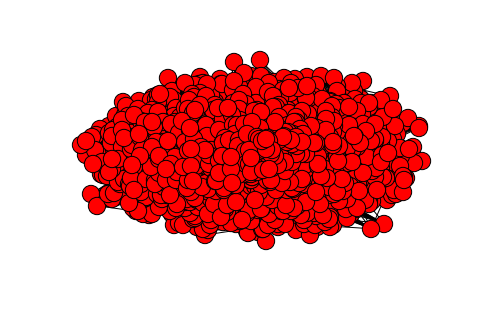

In [313]:
graph = nx.from_numpy_matrix(totalCollocations.values)
nx.draw(graph)
plt.figure(figsize=(80,50))
plt.show()

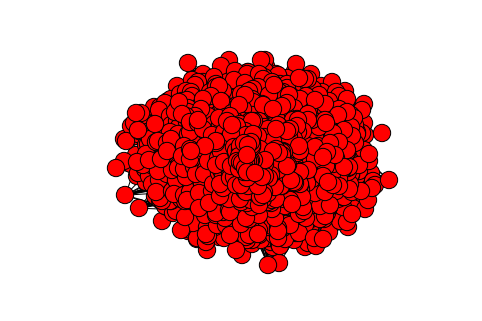

In [316]:
nx.draw(graph)
plt.figure(figsize=(300,180))
plt.show()

In [106]:
for x in itertools.combinations(data["2009"][0],2):
    print x

(Word(u'tijd/NN'), Word(u'vastberadenheid/NN'))
(Word(u'tijd/NN'), Word(u'bereidheid/NN'))
(Word(u'tijd/NN'), Word(u'verandering/NN'))
(Word(u'tijd/NN'), Word(u'wereldwijde/NN'))
(Word(u'tijd/NN'), Word(u'crisis/NN'))
(Word(u'tijd/NN'), Word(u'Nederland/NNP'))
(Word(u'tijd/NN'), Word(u'snelheid/NN'))
(Word(u'tijd/NN'), Word(u'gebeurtenissen/NNS'))
(Word(u'tijd/NN'), Word(u'jaar/NN'))
(Word(u'tijd/NN'), Word(u'Mensen/NNS'))
(Word(u'tijd/NN'), Word(u'baan/NN'))
(Word(u'tijd/NN'), Word(u'aantal/NN'))
(Word(u'tijd/NN'), Word(u'faillissementen/NNS'))
(Word(u'tijd/NN'), Word(u'vermogens/NNS'))
(Word(u'tijd/NN'), Word(u'slinken/NNS'))
(Word(u'tijd/NN'), Word(u'overheidsfinanci\xebn/NN'))
(Word(u'tijd/NN'), Word(u'tekorten/NNS'))
(Word(u'tijd/NN'), Word(u'gevolgen/NNS'))
(Word(u'tijd/NN'), Word(u'ontsporingen/NNS'))
(Word(u'tijd/NN'), Word(u'sector/NN'))
(Word(u'tijd/NN'), Word(u'instituties/NNS'))
(Word(u'tijd/NN'), Word(u'bestuurders/NNS'))
(Word(u'tijd/NN'), Word(u'onzekerheid/NN'))
(Word(u

In [9]:
'''Bepalen van AVI niveau per jaar, hoe lager de score, hoe moeilijker de tekst'''
for year in sorted(dataPerYear):
    gemZinslengte = dataPerYear[year][2]/dataPerYear[year][1]
    gemWoordlengte = dataPerYear[year][3]/dataPerYear[year][2]
    leesindex = 195 - (2*gemZinslengte) - (200/3)*gemWoordlengte
    print year, leesindex

1818 75
1820 61
1821 67
1822 75
1823 79
1824 75
1825 67
1826 51
1827 69
1828 45
1829 51
1830 39
1831 39
1832 59
1833 41
1834 53
1835 59
1836 83
1838 83
1839 83
1840 67
1841 71
1842 79
1843 75
1844 85
1845 81
1846 75
1847 75
1848 57
1849 83
1870 95
1871 97
1872 93
1873 89
1874 89
1875 79
1876 93
1877 89
1878 91
1879 95
1880 97
1882 99
1883 93
1884 81
1885 87
1886 97
1887 93
1891 93
1892 89
1893 97
1894 77
1895 95
1896 93
1897 93
1898 91
1899 89
1900 87
1904 89
1923 85
1925 89
1926 87
1927 81
1928 87
1929 87
1930 87
1931 81
1932 81
1933 77
1934 75
1935 79
1936 79
1937 67
1938 69
1939 85
1946 77
1954 83
1955 83
1956 87
1957 85
1958 83
1959 73
1960 81
1961 83
1962 85
1963 85
1964 89
1965 87
1966 89
1967 85
1976 91
1978 93
1979 95
1980 91
1981 91
1982 91
1983 91
1984 91
1985 89
1986 91
1987 93
1988 89
1989 89
2000 97
2001 97
2002 91
2003 95
2004 95
2005 99
2006 99
2007 99
2008 103
2009 91
2010 97
2011 95
2012 93
2013 93
2014 93


In [11]:
'''Tekst leesbaarheidsniveau per jaar aan de hand van de "Flesch–Kincaid readability test"'''
for rede in sorted(redes):
    print rede, (readability(redes[rede])*100)

1818 21.9686751337
1820 17.381832088
1821 17.4356530716
1822 21.0736280376
1823 24.2323457591
1824 23.0216402157
1825 16.684184888
1826 8.24225802139
1827 13.5569300653
1828 3.72675768968
1829 6.8566058129
1830 3.78638607595
1831 3.67942741935
1832 9.0654939759
1833 0.0
1834 4.0769539749
1835 7.9655632515
1836 19.4084420156
1838 22.3172774899
1839 18.7728996656
1840 13.709185567
1841 16.7469725527
1842 17.0549591529
1843 12.1424920799
1844 22.7245703226
1845 20.9697295597
1846 12.0201630417
1847 18.5037771084
1848 16.4074150943
1849 25.1052285143
1870 22.3959712644
1871 27.5113567062
1872 22.8651306857
1873 20.9431542331
1874 21.9104210526
1875 17.8167115282
1876 23.0936708408
1877 20.0242608117
1878 26.3679350649
1879 29.7935294282
1880 20.8926818182
1882 25.0127727273
1883 23.7571205242
1884 20.1094603524
1885 18.8962843137
1886 22.0910714286
1887 23.4358093923
1891 17.9484166667
1892 22.6765806452
1893 25.78925
1894 14.2607217391
1895 28.7075780642
1896 25.2864021226
1897 26.3599400